In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np 

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')
%matplotlib inline

In [2]:
stud_math.info()
stud_math.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
numerical_columns = ['age', 'absences', 'score']
categorial_columns = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                      'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                      'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [4]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [5]:
stud_math.drop(['studytime, granular'], inplace=True, axis=1)

In [6]:
stud_math.isnull().sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [7]:
def fill_nan_address_traveltime(data):
    u_traveltime = data[data.address == 'U']['traveltime'].median()
    r_traveltime = data[data.address == 'R']['traveltime'].median()
    for i in data.index:
        if pd.isnull(data.address.loc[i]) and pd.isnull(data.traveltime.loc[i]):
            pass
        elif pd.isnull(data.address.loc[i]):
            if data.traveltime.loc[i] <= u_traveltime:
                data.at[i, 'address'] = 'U'
            else:
                data.at[i, 'address'] = 'R'
        elif pd.isnull(data.traveltime.loc[i]):
            if data.at[i, 'address'] == 'U':
                data.at[i, 'traveltime'] = u_traveltime
            else:
                data.at[i, 'traveltime'] = r_traveltime
    return data

In [8]:
def graf_num(col):
    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(12, 6)
    )

    ax1.hist(stud_math[col], bins=77)
    ax1.set_title(f'Гистограмма {col}')
    ax1.set_xlabel(f'значения {col}')
    ax1.set_ylabel('количество значений')

    sns.swarmplot(x=col, y='score', data=stud_math, ax=ax2)

    ax2.set_title(f'Зависимость баллов от {col}')
    ax2.set_xlabel(f'значения {col}')
    ax2.set_ylabel('баллы')

    plt.show

In [9]:
def graf_cat(col):
    fig, (ax1, ax2, ax) = plt.subplots(
        nrows=1, ncols=3,
        figsize=(12, 6)
    )

    ax1.hist(stud_math[col])
    ax1.set_title(f'Гистограмма {col}')
    ax1.set_xlabel(f'значения {col}')
    ax1.set_ylabel('количество значений')

    sns.boxplot(col, "score", data=stud_math, ax=ax2)

    ax2.set_title(f'Зависимость баллов от {col}')
    ax2.set_xlabel(f'значения {col}')
    ax2.set_ylabel('баллы')

    sns.swarmplot(col, "score", data=stud_math, ax=ax)

    ax.set_title(f'Зависимость баллов от {col}')
    ax.set_xlabel(f'значения {col}')
    ax.set_ylabel('баллы')

    plt.show()

In [10]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [11]:
stud_math = stud_math.loc[stud_math.score.notnull()]

In [12]:
stud_math = fill_nan_address_traveltime(stud_math)

In [13]:
for col in numerical_columns:
    print(col)
    print(stud_math[col].describe())
    b = stud_math[col].isnull().sum()
    print(f'В колонке пропущнных значений: {b}')

age
count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
В колонке пропущнных значений: 0
absences
count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
В колонке пропущнных значений: 11
score
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
В колонке пропущнных значений: 0


In [14]:
for col in categorial_columns:
    print(col)
    a = stud_math[col].isnull().sum()
    print(f'В колонке уникальных значений: {stud_math[col].nunique()}')
    print(f'В колонке пропущнных значений: {a}')
    print(stud_math[col].describe())
    print('Распределение значений в %:')
    print(pd.DataFrame(stud_math[col].value_counts(1)))

Medu
В колонке уникальных значений: 5
В колонке пропущнных значений: 3
count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
Распределение значений в %:
         Medu
4.0  0.339378
2.0  0.259067
3.0  0.248705
1.0  0.145078
0.0  0.007772
Fedu
В колонке уникальных значений: 6
В колонке пропущнных значений: 24
count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
Распределение значений в %:
          Fedu
2.0   0.287671
3.0   0.257534
4.0   0.241096
1.0   0.205479
0.0   0.005479
40.0  0.002740
Mjob
В колонке уникальных значений: 5
В колонке пропущнных значений: 19
count       370
unique        5
top       other
freq        127
Name: Mjob, dtype: object
Распределение значений в %:
              Mjob
other     0.343243
services  

In [15]:
outlier1 = outlier2 = 0
q1 = stud_math['absences'].quantile(q=0.25, interpolation='midpoint')
q3 = stud_math['absences'].quantile(q=0.75, interpolation='midpoint')
MR = round(q3 - q1, 1)
limit1 = q1 - 1.5 * MR
limit2 = q3 + 1.5 * MR
if stud_math['absences'].min() < limit1:
    print(f'выбросы ниже {limit1}')
elif stud_math['absences'].max() > limit2:
    print(f'выбросы выше {limit2}')
else:
    print('выбросов нет')

выбросы выше 20.0


In [16]:
stud_math = stud_math.loc[stud_math.absences.between(0, 30)]

In [17]:
stud_math.Fedu = stud_math.Fedu.astype(float)
stud_math = stud_math.loc[stud_math.Fedu.between(0, 4)]

In [18]:
for i in stud_math.columns:
    stud_math.loc[:, i] = stud_math.loc[:, i].astype(str).apply(lambda x: None if x.strip() == '' else x)
    mode_i =  stud_math.loc[:, i].mode()
    stud_math.loc[:, i] = stud_math.loc[:, i].apply(lambda x:x.replace('nan', mode_i[0]))

In [19]:
stud_math.famrel = stud_math.famrel.astype(float)
stud_math = stud_math.loc[stud_math.famrel.between(1, 5)]

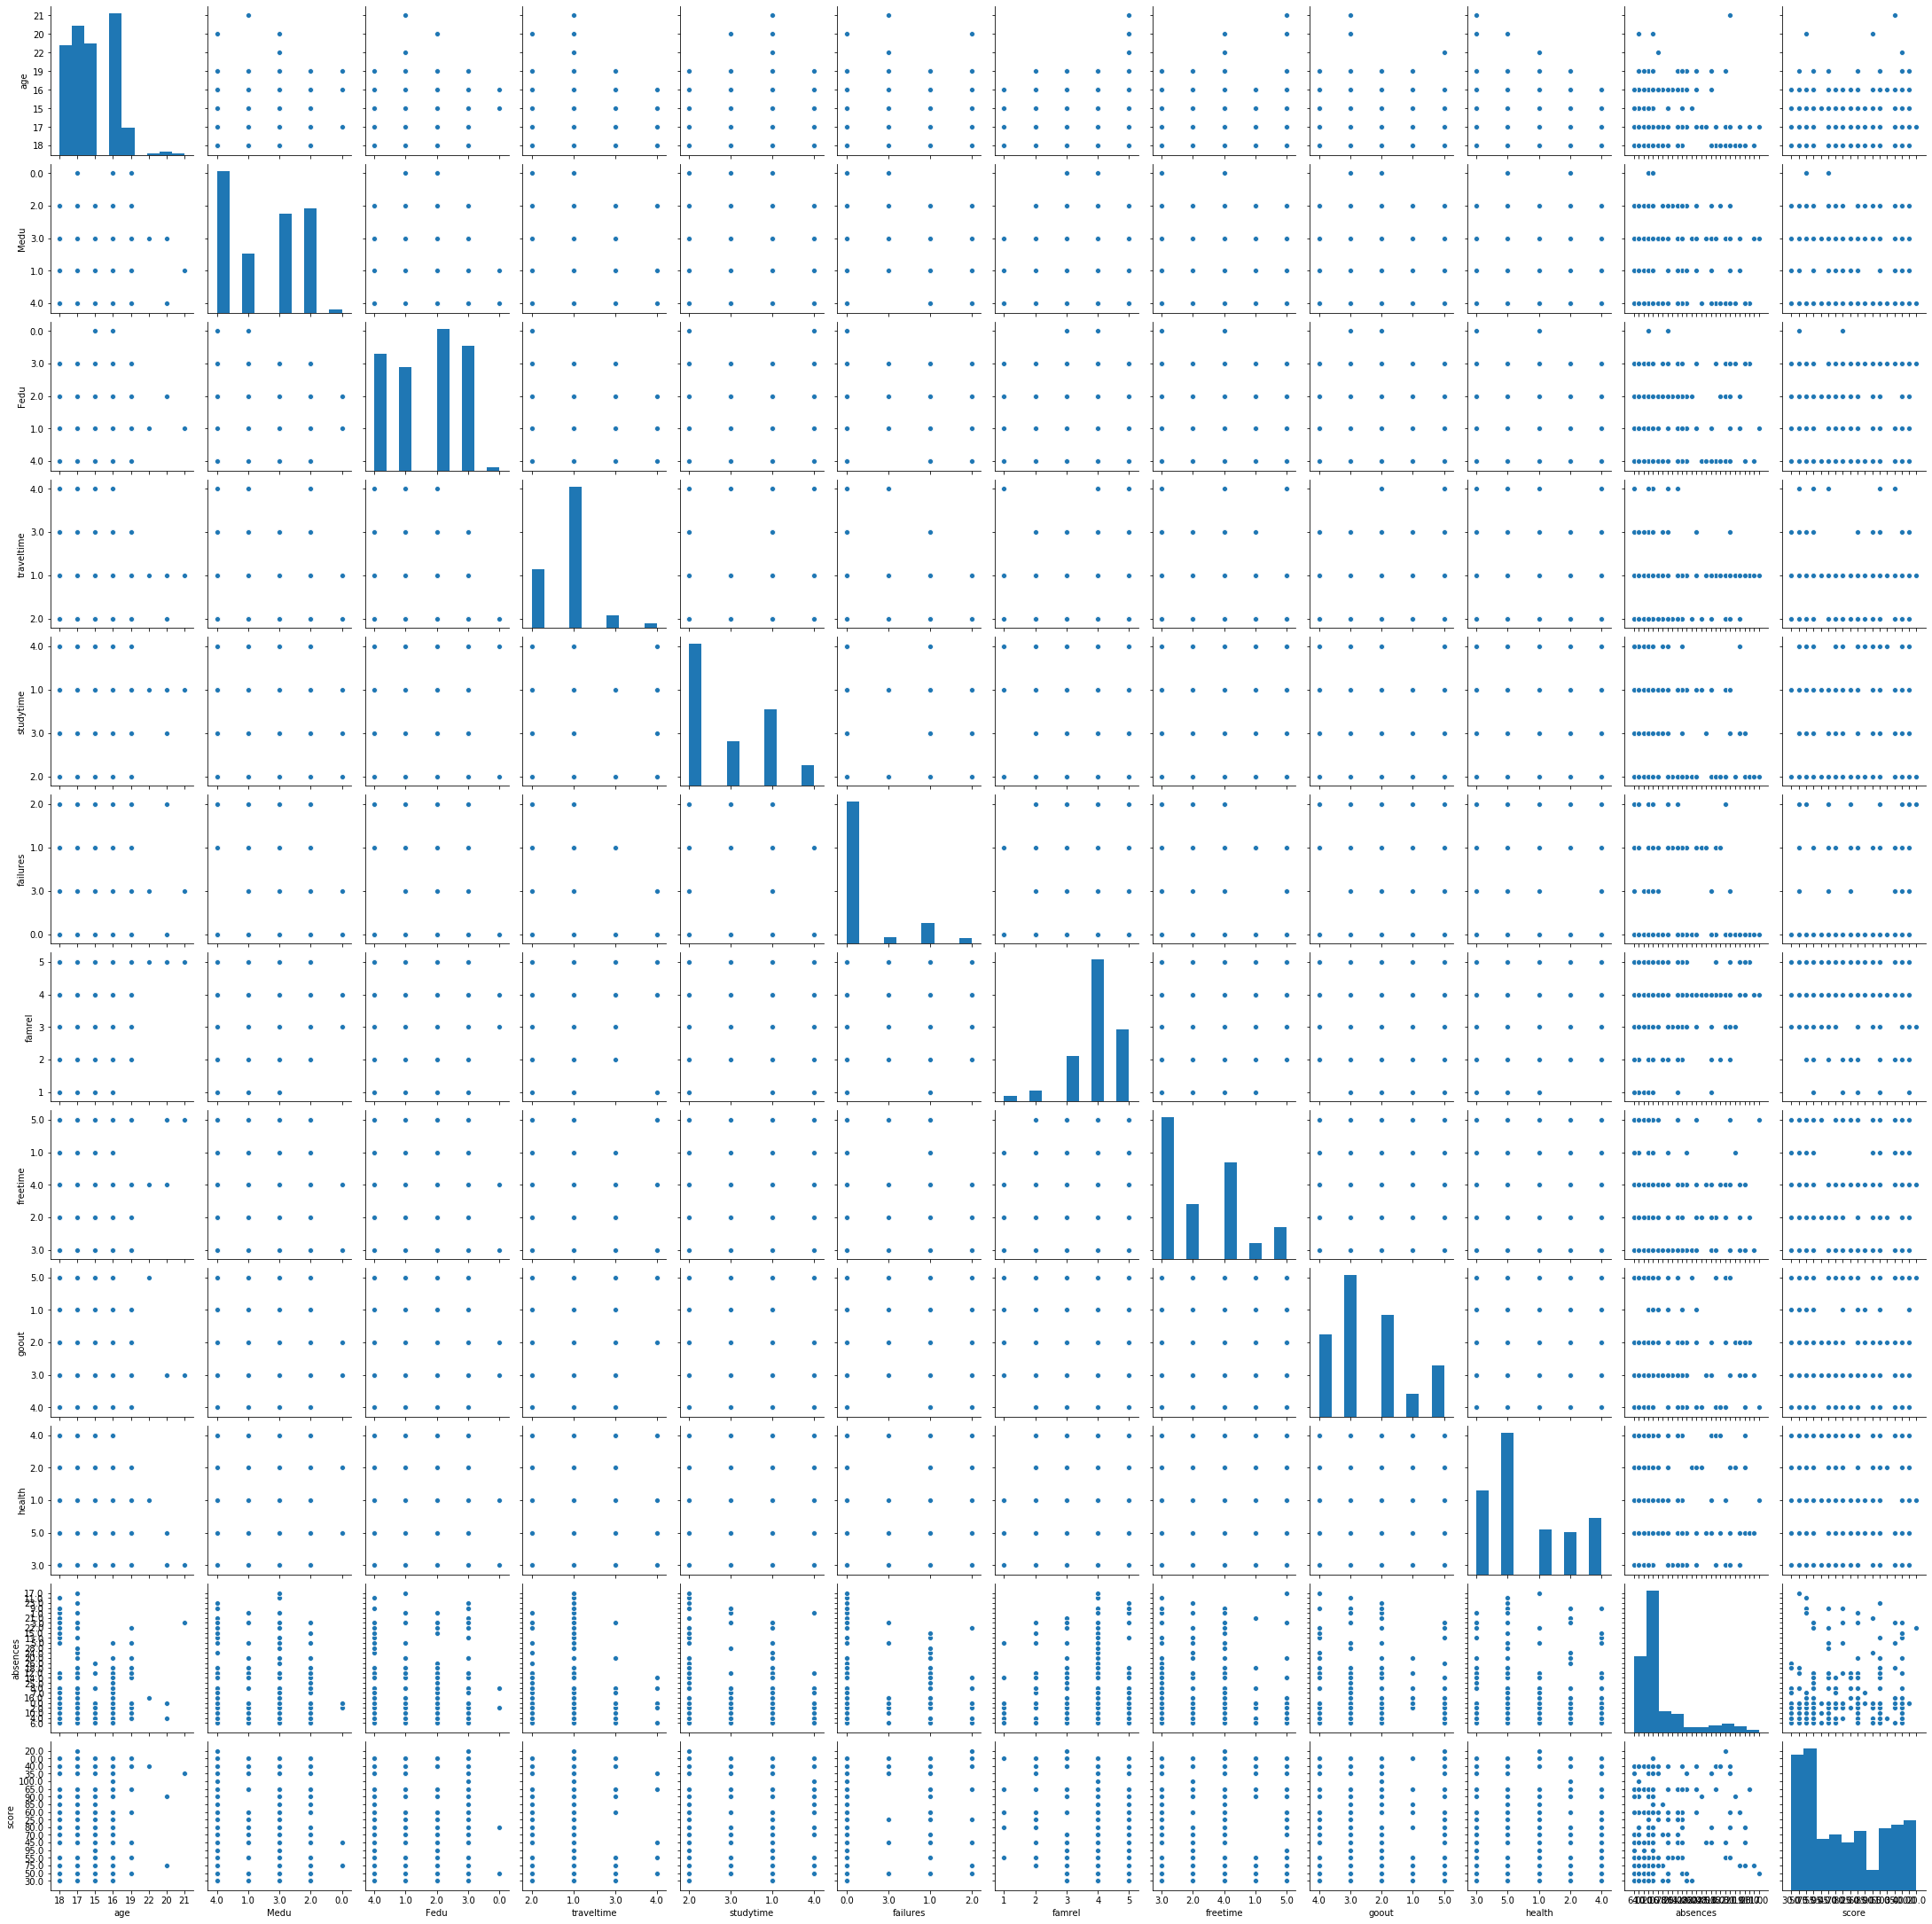

In [20]:
sns.pairplot(stud_math)

In [21]:
stud_math = pd.read_csv('stud_math.csv')
for i in categorial_columns:
    stud_math.loc[:, i] = stud_math.loc[:, i].astype(
        str).apply(lambda x: None if x.strip() == '' else x)
stud_math.famrel = stud_math.famrel.astype(float)
stud_math = stud_math.loc[stud_math.famrel.between(1, 5)]
stud_math.Fedu = stud_math.Fedu.astype(float)
stud_math = stud_math.loc[stud_math.score.notnull()]
stud_math = stud_math.loc[stud_math.absences.between(0, 30)]
stud_math = stud_math.loc[stud_math.Fedu.between(0, 4)]
for col in categorial_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки higher


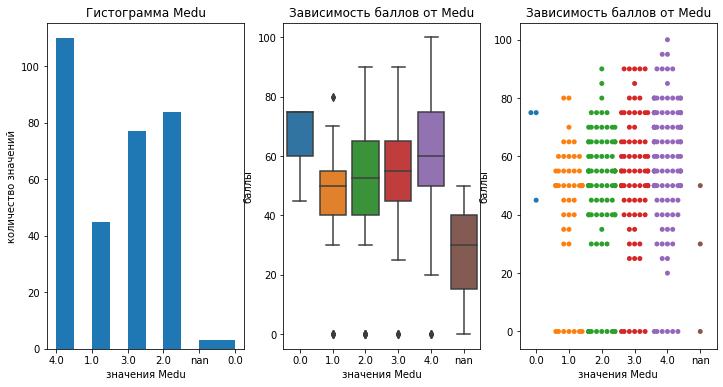

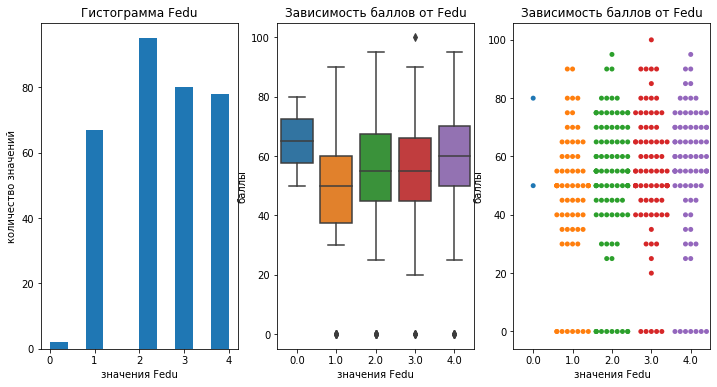

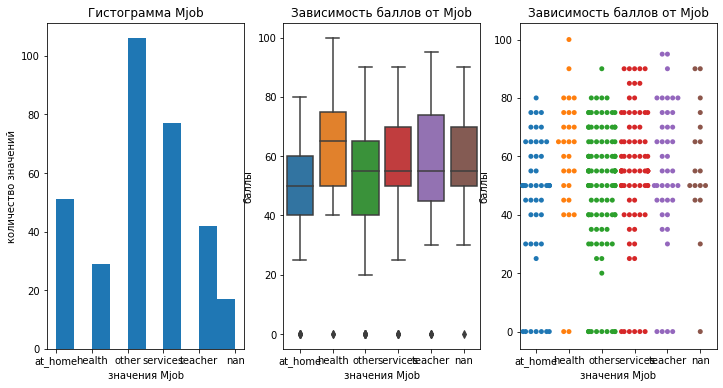

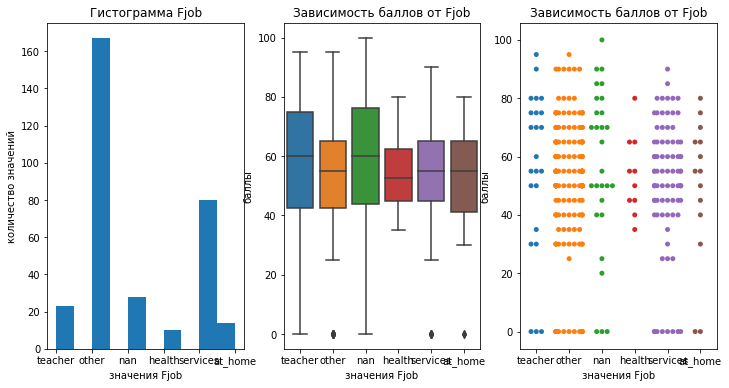

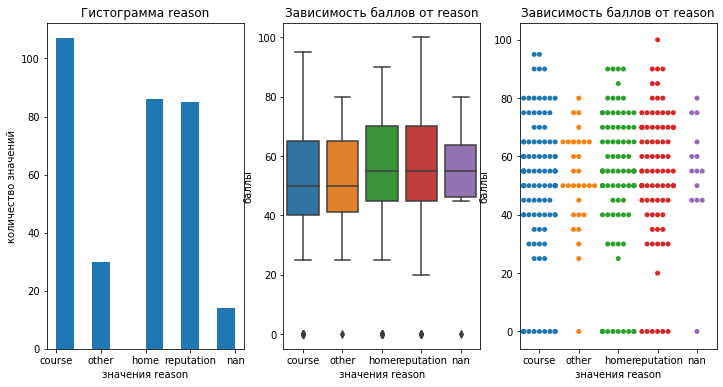

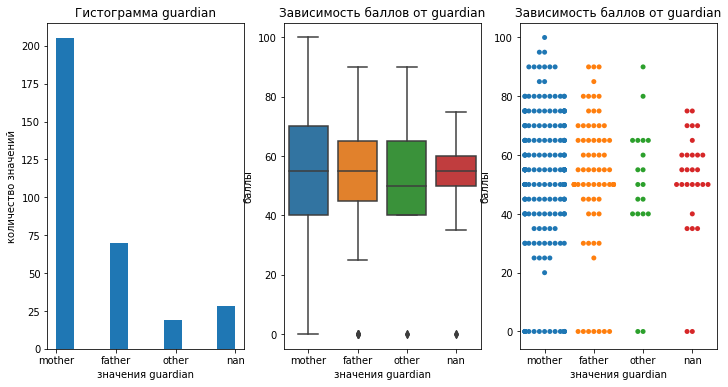

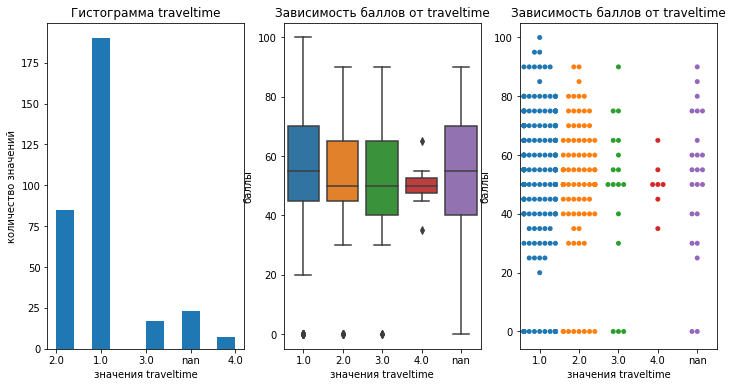

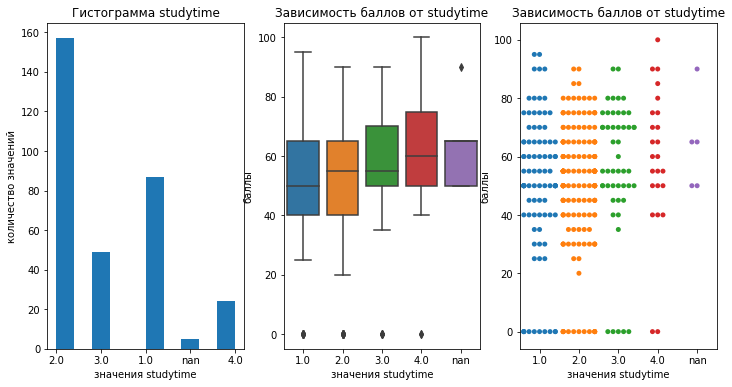

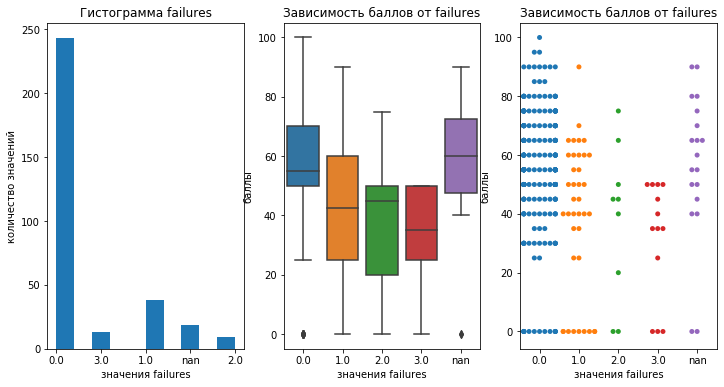

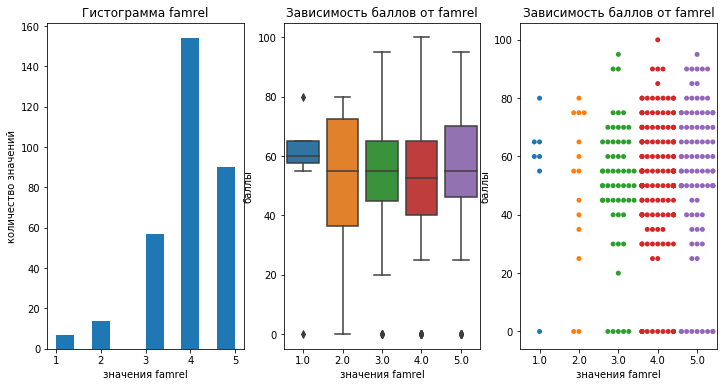

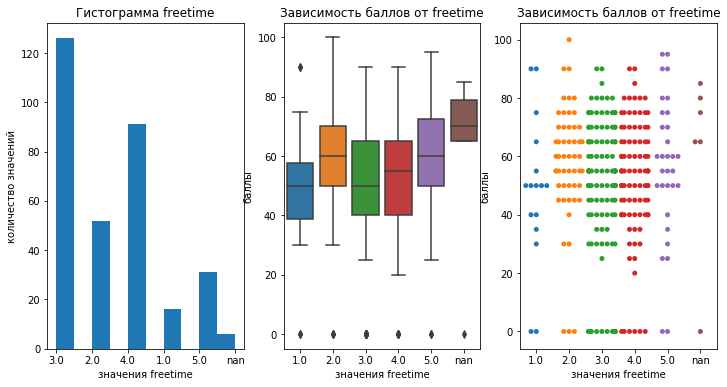

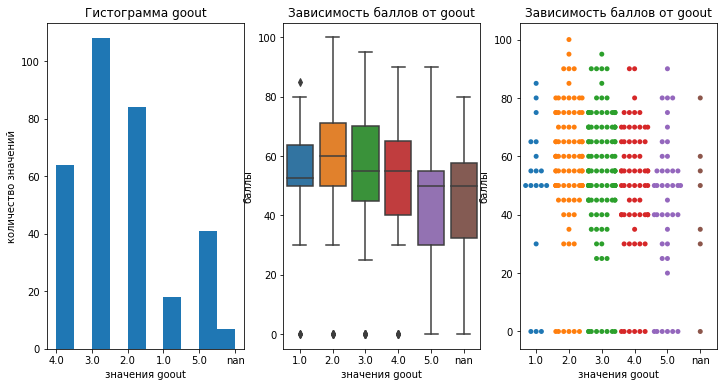

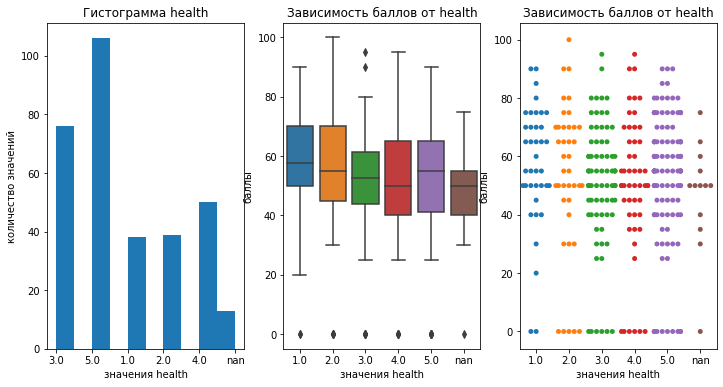

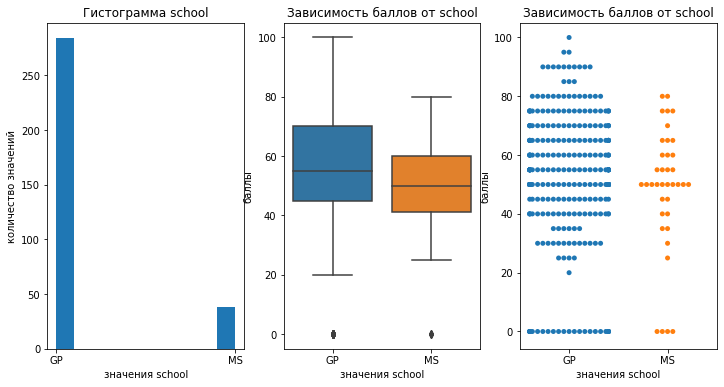

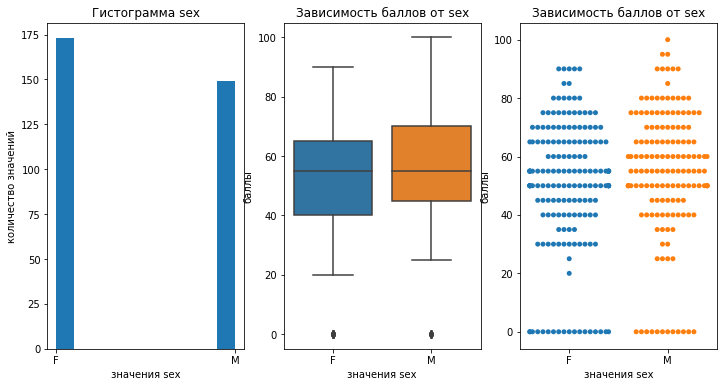

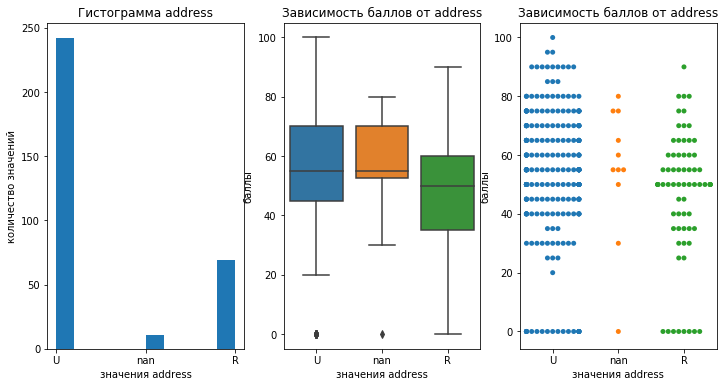

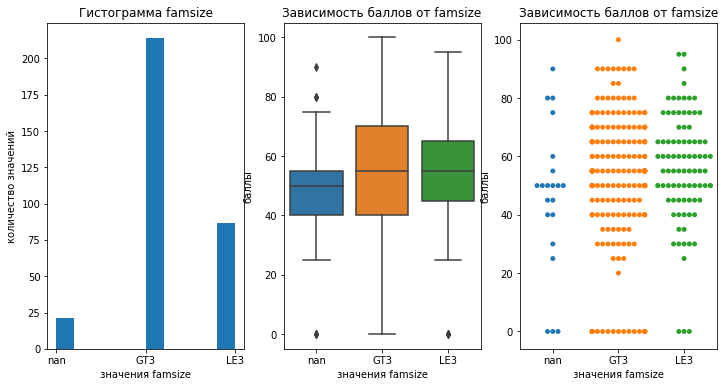

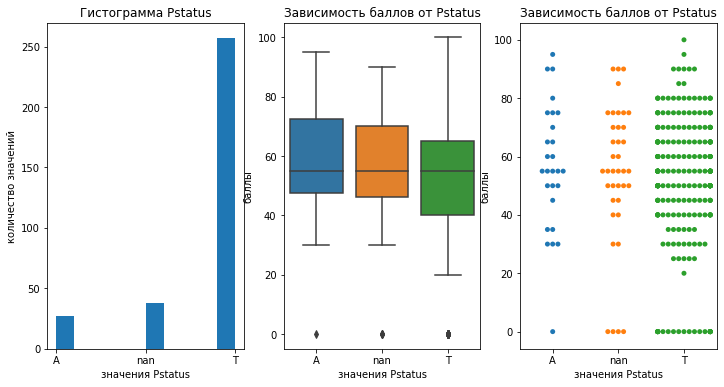

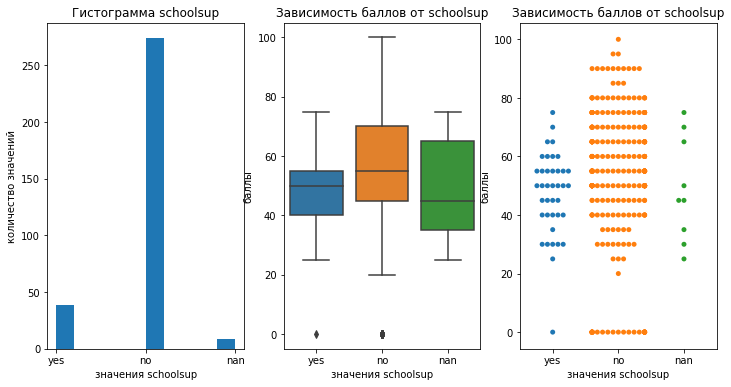

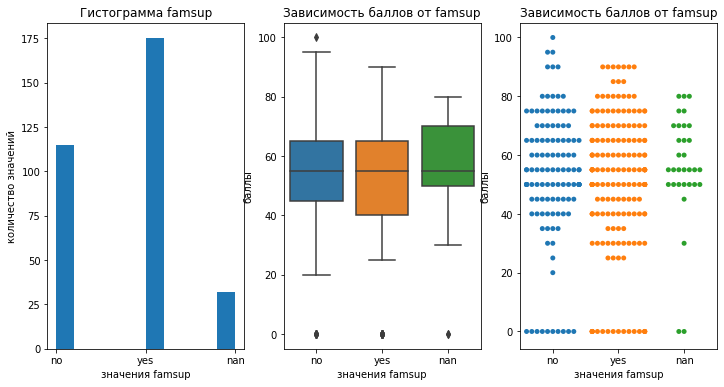

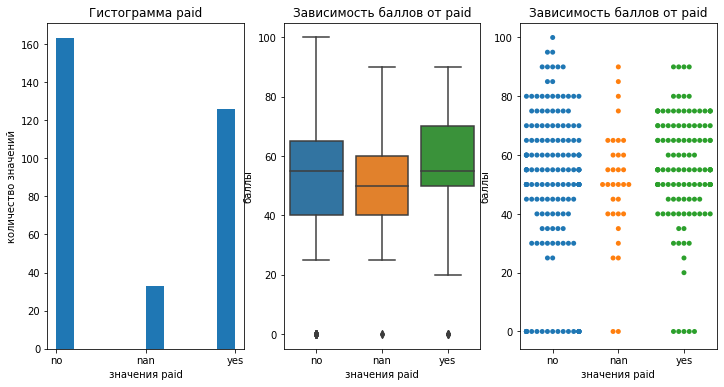

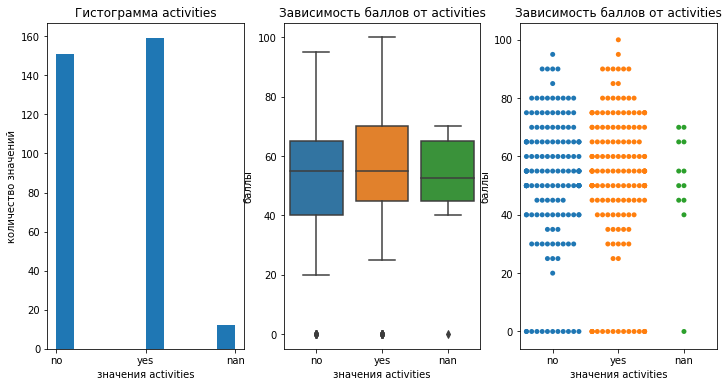

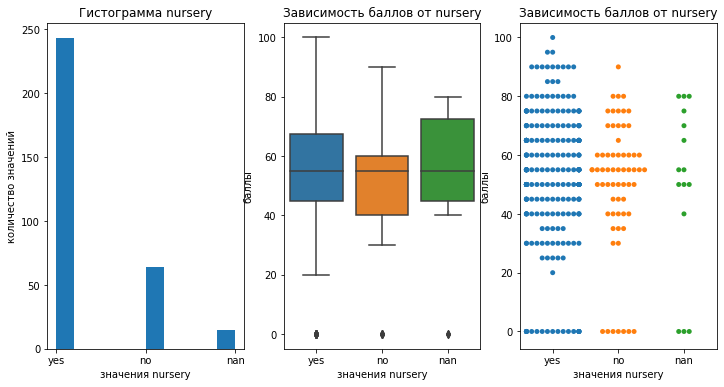

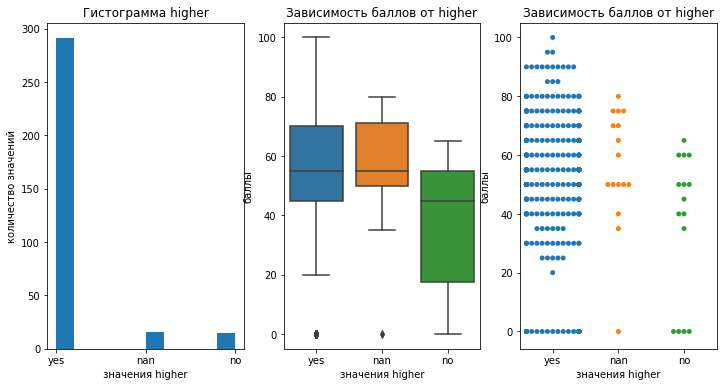

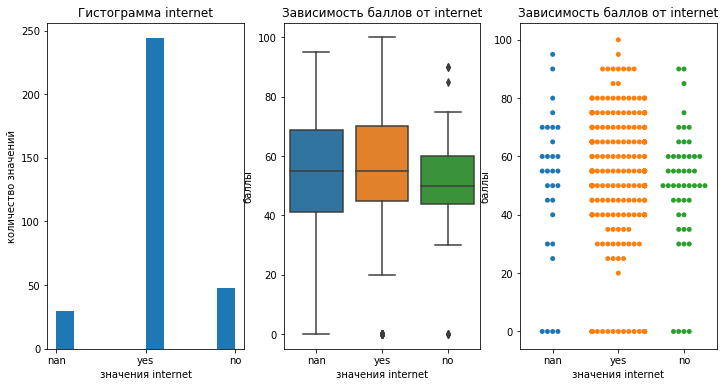

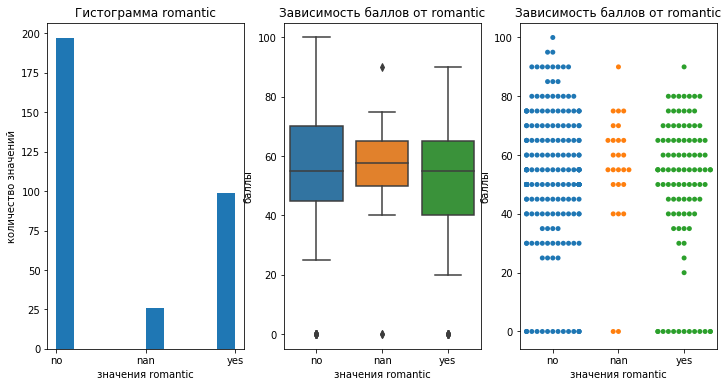

In [22]:
for i in categorial_columns:
    graf_cat(i)

# The main columns for investigating are: age, absences, address, schoolsup, paid, higher, romanic, Medu, failures, goout